<a href="https://colab.research.google.com/github/JJJuniorDev/ML-colab/blob/main/generating_images_try.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import fetch_olivetti_faces

olivetti = fetch_olivetti_faces()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


In [2]:
print(olivetti.DESCR)

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: https://cam-orl.co.uk/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position
    (with tolerance for some side movement).

**Data Set Characteristics:**

=================   =====================
Classes              

In [3]:
from sklearn.model_selection import StratifiedShuffleSplit

strat_split = StratifiedShuffleSplit(n_splits=1, test_size=40, random_state=42)
train_valid_idx, test_idx = next(strat_split.split(olivetti.data,
                                                   olivetti.target))
X_train_valid = olivetti.data[train_valid_idx]
y_train_valid = olivetti.target[train_valid_idx]
X_test = olivetti.data[test_idx]
y_test = olivetti.target[test_idx]

strat_split = StratifiedShuffleSplit(n_splits=1, test_size=80, random_state=43)
train_idx, valid_idx = next(strat_split.split(X_train_valid, y_train_valid))
X_train = X_train_valid[train_idx]
y_train = y_train_valid[train_idx]
X_valid = X_train_valid[valid_idx]
y_valid = y_train_valid[valid_idx]

In [10]:
from sklearn.decomposition import PCA
pca= PCA(0.99)
X_train_pca= pca.fit_transform(X_train)
X_valid_pca= pca.transform(X_valid)
X_test_pca= pca.transform(X_test)
pca.n_components_

np.int64(199)

In [25]:
import numpy as np
from sklearn.mixture import BayesianGaussianMixture
bgm= BayesianGaussianMixture(n_components=120, n_init=10, random_state=42)
bgm.fit(X_train_pca)
bgm.weights_.round(2)
# Conta i cluster "attivi" (>1% del peso totale)
active_components = np.sum(bgm.weights_ > 0.005)
print("Numero di componenti effettivi:", active_components)

Numero di componenti effettivi: 81


In [14]:
X_new, y_new= bgm.sample(100)
X_new

array([[-3.05294237e+00, -1.34504943e-02, -7.13459942e-01, ...,
        -4.66840437e-02,  7.34558574e-02, -6.93350022e-03],
       [-3.05735825e+00, -3.04678419e-01, -3.23891488e-01, ...,
        -2.03437127e-02,  8.05154148e-02, -3.59220670e-02],
       [-2.94094948e+00,  5.71747618e-02, -6.34362220e-01, ...,
        -4.97695320e-02,  8.34396916e-02,  2.87012102e-03],
       ...,
       [ 1.17698268e+00, -1.77160681e+00,  1.90666721e+00, ...,
         5.62004799e-03, -4.87469199e-02,  7.31197943e-02],
       [ 7.10197258e-01, -1.39422271e+00,  8.46769623e-01, ...,
         6.19851548e-03, -3.06883252e-02,  8.02224076e-02],
       [ 3.20341132e+00,  1.98938680e+00,  2.68476361e-01, ...,
         3.65510691e-02, -6.98587493e-02,  7.33365156e-02]])

In [15]:
y_new

array([  1,   1,   1,   1,   1,   1,   2,   2,   3,   7,   7,   8,   8,
         9,   9,  11,  11,  11,  11,  12,  12,  14,  16,  17,  17,  18,
        19,  20,  22,  23,  24,  24,  25,  25,  27,  28,  30,  31,  33,
        33,  33,  33,  34,  34,  34,  34,  35,  36,  38,  38,  39,  41,
        43,  43,  43,  44,  45,  46,  47,  48,  50,  50,  50,  51,  51,
        52,  52,  52,  53,  53,  53,  54,  55,  55,  55,  62,  65,  67,
        69,  69,  69,  70,  73,  73,  74,  75,  76,  80,  81,  86,  88,
        91,  92,  94, 104, 104, 107, 112, 112, 114])

In [21]:
import matplotlib.pyplot as plt

def plot_faces(images, labels=None, h=64, w=64, n_row=10, n_col=10):
    """Plot a grid of faces"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    for i in range(min(len(images), n_row * n_col)):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap='gray')
        if labels is not None:
            plt.title(labels[i])
        plt.xticks(())
        plt.yticks(())
    plt.show()


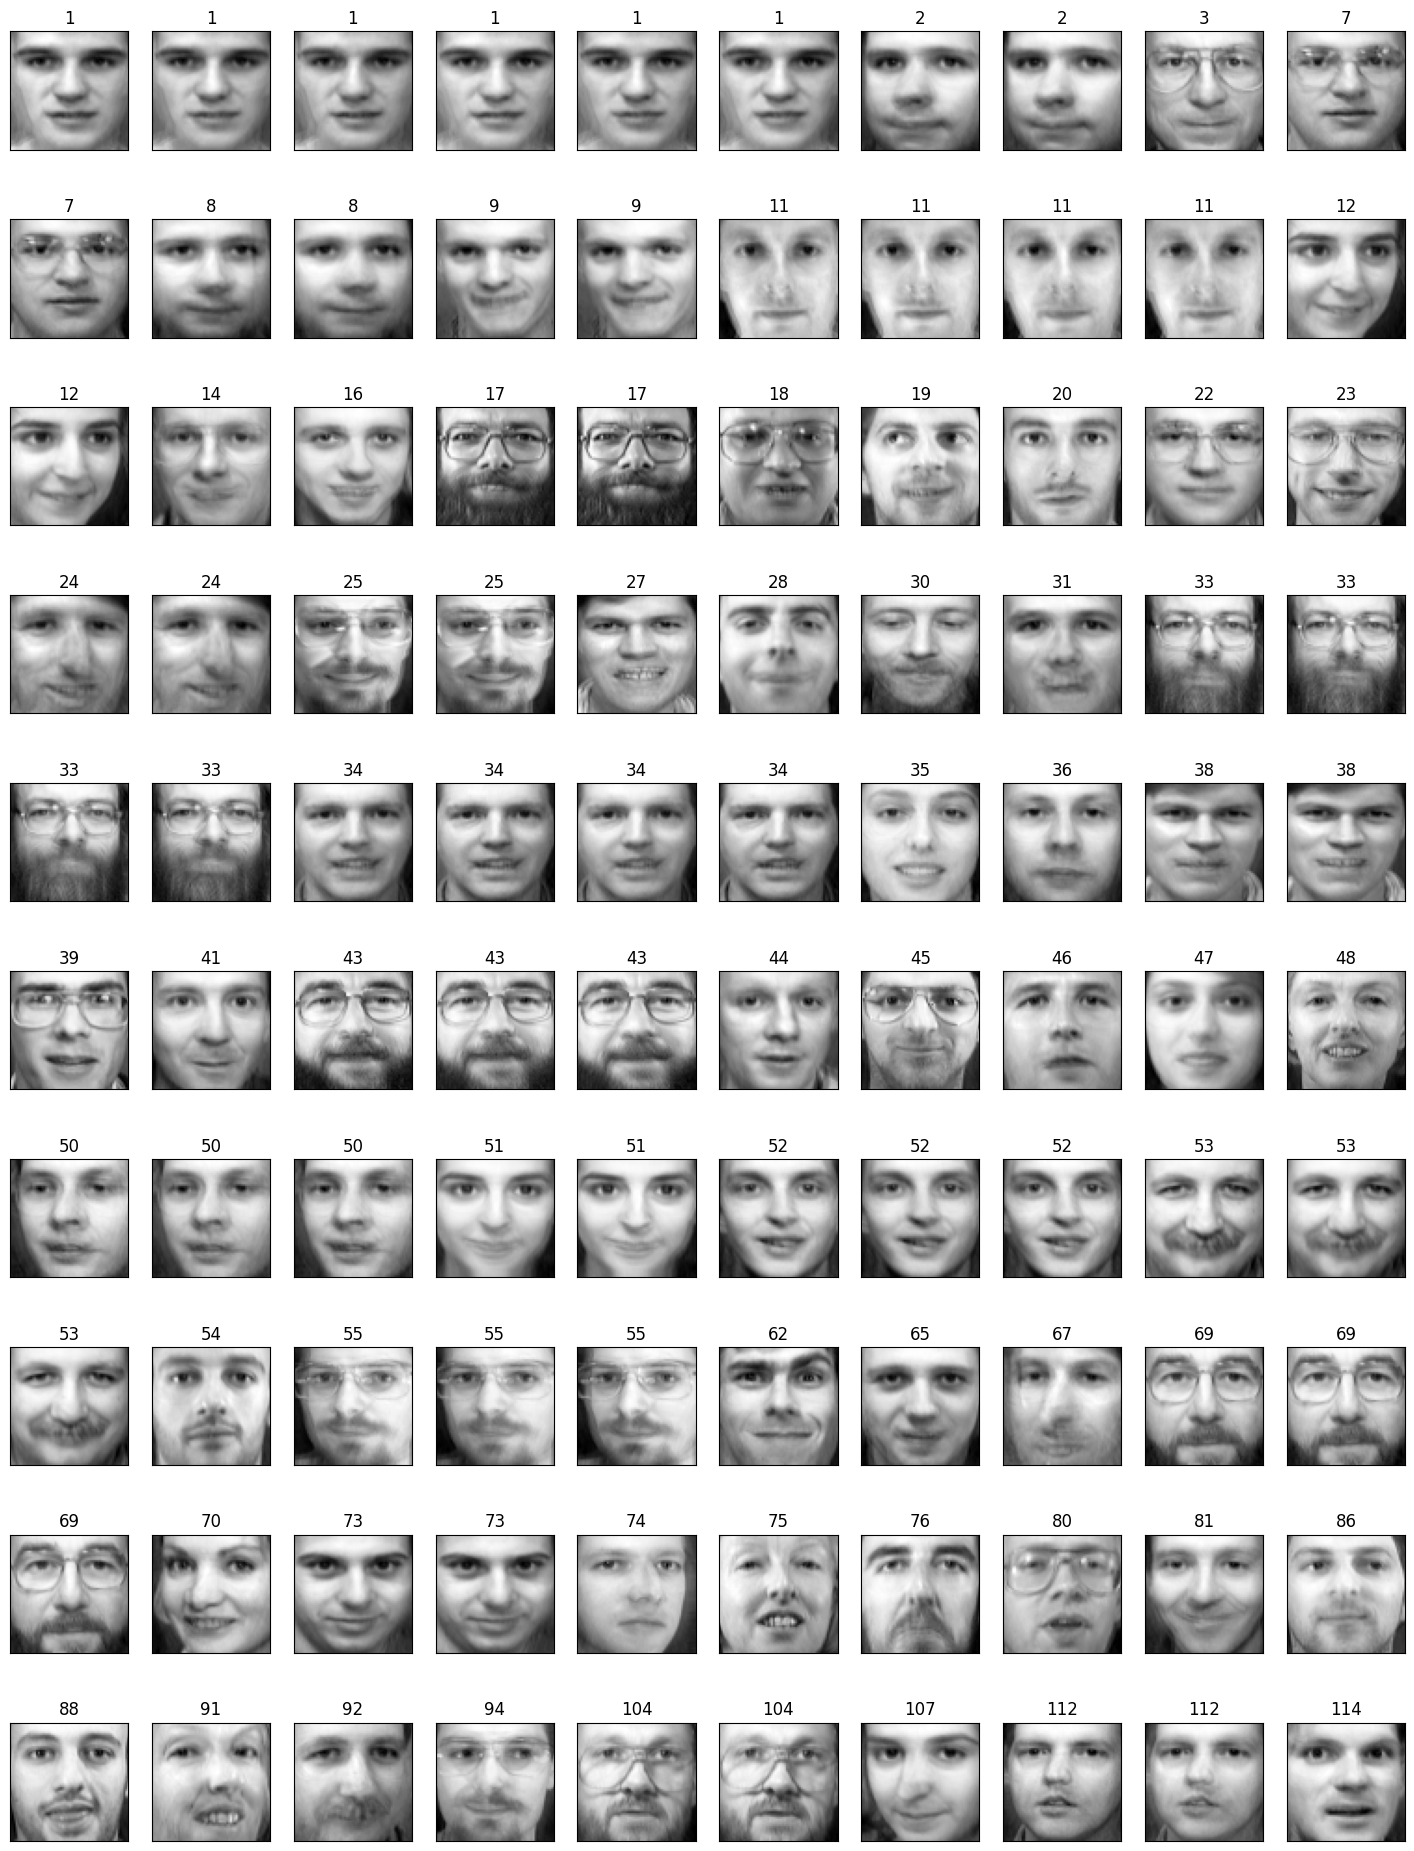

In [22]:
gen_faces = pca.inverse_transform(X_new)
plot_faces(gen_faces, y_new)